In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data=pd.read_excel("pokemon_data.xlsx")

In [9]:
data

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weakness,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass,Poison",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,69.00,20:00,1.58,"Fire,Ice,Flying,Psychic","Ivysaur,Venusaur",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass,Poison",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"1.2,1.6","Fire,Ice,Flying,Psychic",Venusaur,Bulbasaur
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass,Poison",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,NaN,"Fire,Ice,Flying,Psychic",NaN,"Bulbasaur,Ivysaur"
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,1.65,"Water,Ground,Rock","Charmeleon,Charizard",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,1.79,"Water,Ground,Rock",Charizard,Charmander
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,Dragon,1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"1.83,1.84","Ice,Dragon,Fairy","Dragonair,Dragonite",NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,2.05,"Ice,Dragon,Fairy",Dragonite,Dratini
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"Dragon,Flying",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,NaN,"Ice,Rock,Dragon,Fairy",NaN,"Dratini,Dragonair"
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"Bug,Ghost,Dark",NaN,NaN


In [10]:
spawn_rate_less_than_5 = data[data['spawn_chance'] < 5]

In [12]:
# Get all Pokemons that have less than 4 weaknesses
less_than_4_weaknesses = data[data['weakness'].apply(len) < 4]

In [15]:
no_multipliers = data[data['multipliers'].isnull() | (data['multipliers'].str.len() == 0)]


In [26]:
less_than_2_evolutions = data[pd.notnull(data['next_evolution']) & data['next_evolution'].apply(lambda x: isinstance(x, list) and len(x) <= 2)]


In [27]:
data['spawn_time_seconds'] = data['spawn_time'].apply(lambda x: -1 if isinstance(x, float) else int(x.split(':')[0]) * 60 + int(x.split(':')[1]))
spawn_time_less_than_300 = data[data['spawn_time_seconds'] < 300]


In [28]:
more_than_2_types = data[data['type'].apply(len) > 2]

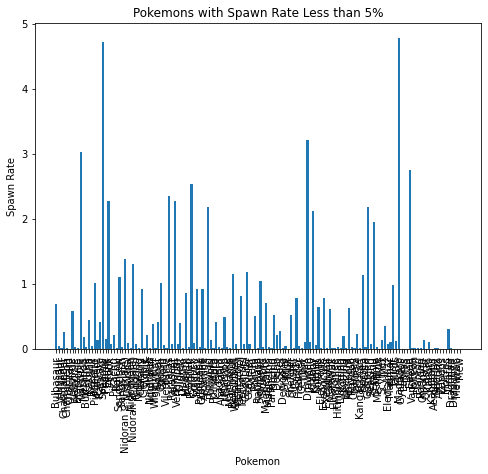

In [29]:
# Bar plot for spawn rate less than 5%
plt.figure(figsize=(8, 6))
plt.bar(spawn_rate_less_than_5['name'], spawn_rate_less_than_5['spawn_chance'])
plt.xlabel('Pokemon')
plt.ylabel('Spawn Rate')
plt.title('Pokemons with Spawn Rate Less than 5%')
plt.xticks(rotation=90)
plt.show()

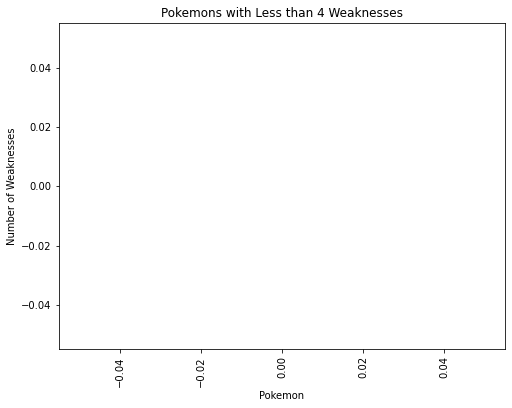

In [30]:
# Bar plot for Pokemons with less than 4 weaknesses
plt.figure(figsize=(8, 6))
plt.bar(less_than_4_weaknesses['name'], less_than_4_weaknesses['weakness'].apply(len))
plt.xlabel('Pokemon')
plt.ylabel('Number of Weaknesses')
plt.title('Pokemons with Less than 4 Weaknesses')
plt.xticks(rotation=90)
plt.show()

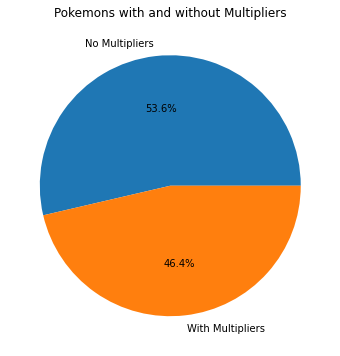

In [31]:
# Pie chart for Pokemons with no multipliers
plt.figure(figsize=(6, 6))
labels = ['No Multipliers', 'With Multipliers']
sizes = [len(no_multipliers), len(data) - len(no_multipliers)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Pokemons with and without Multipliers')
plt.show()

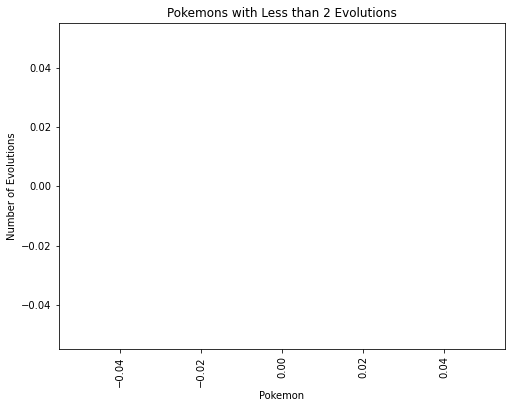

In [32]:
# Bar plot for Pokemons with less than 2 evolutions
plt.figure(figsize=(8, 6))
plt.bar(less_than_2_evolutions['name'], less_than_2_evolutions['next_evolution'].apply(len))
plt.xlabel('Pokemon')
plt.ylabel('Number of Evolutions')
plt.title('Pokemons with Less than 2 Evolutions')
plt.xticks(rotation=90)
plt.show()

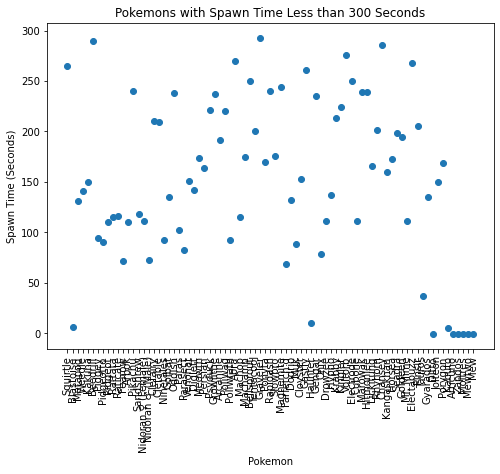

In [33]:
# Scatter plot for Pokemons with spawn time less than 300 seconds
plt.figure(figsize=(8, 6))
plt.scatter(spawn_time_less_than_300['name'], spawn_time_less_than_300['spawn_time_seconds'])
plt.xlabel('Pokemon')
plt.ylabel('Spawn Time (Seconds)')
plt.title('Pokemons with Spawn Time Less than 300 Seconds')
plt.xticks(rotation=90)
plt.show()

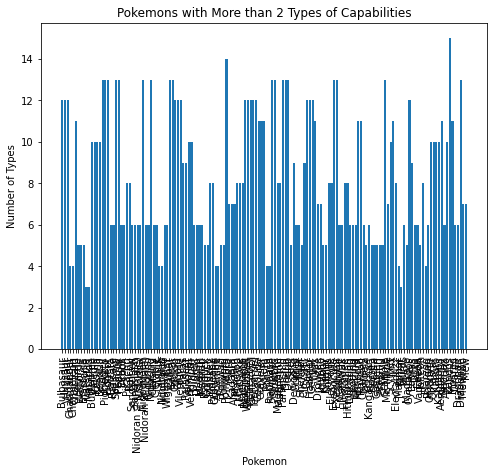

In [36]:
# Bar plot for Pokemons with more than 2 types of capabilities
plt.figure(figsize=(8, 6))
plt.bar(more_than_2_types['name'], more_than_2_types['type'].apply(len))
plt.xlabel('Pokemon')
plt.ylabel('Number of Types')
plt.title('Pokemons with More than 2 Types of Capabilities')
plt.xticks(rotation=90)
plt.show()